<a href="https://colab.research.google.com/github/StefanRaduMaris/AI-model-product_classifier/blob/main/notebook/product_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 AI Product Categorization Model
    – Project Description

This notebook presents the full workflow of developing an AI model for product categorization. The model is designed to automatically classify products into predefined categories based on their characteristics (such as name, description, or other features). This approach can be used for e-commerce, inventory management, or retail analytics.

## 📌 Project Objectives

Build a machine learning model capable of classifying products into categories.

Process and prepare product data for model training.

Train and evaluate different algorithms to find the best-performing model.

Provide accurate and reliable product category predictions.

## 🔍 Step 1: Problem Definition

The goal of this project is to automatically assign a category to each product.
We aim to solve a classification problem, where the expected output is a category label (e.g., Electronics, Clothing, Food, etc.).
This model helps improve product catalog organization and reduces manual tagging work.

## 📊 Step 2: Data Collection & Exploration

We load a dataset containing products and their corresponding categories.
In this step, we:

Examine product features (e.g., name, description, price).

Check the distribution of categories.

Identify missing or inconsistent values.

Visualize data to understand common patterns across product types.

By exploring the dataset, we gain insights into which features are most helpful for categorization.

In [32]:
#i need to import pandas because this library is helping me to read my file from github
import pandas as pd
#This url is the path to find data file on my github account
url='https://raw.githubusercontent.com/StefanRaduMaris/AI-model-product_classifier/refs/heads/main/data/products.csv'

#We read the csv file
df = pd.read_csv(url)

#First look in this data
print(df.head(10))

#Checking quantity of information(how my rows)
print(f"We have {df.shape[0]} rows and {df.shape[1] } columns")
#Checking data type and missing values
print(df.info())
print(df.isna().sum())


   product ID                                      Product Title  Merchant ID  \
0           1                    apple iphone 8 plus 64gb silver            1   
1           2                apple iphone 8 plus 64 gb spacegrau            2   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...            3   
3           4                apple iphone 8 plus 64gb space grey            4   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...            5   
5           6  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...            6   
6           7               apple iphone 8 plus 64 gb space grey            7   
7           8                apple iphone 8 plus 64gb space grey            8   
8           9                apple iphone 8 plus 64gb space grey            9   
9          10                apple iphone 8 plus 64gb space grey           10   

   Category Label _Product Code  Number_of_Views  Merchant Rating  \
0   Mobile Phones    QA-2276-XC        

Overall, the dataset is relatively complete, with missing values present in several columns but at a minimal proportion. It provides a rich foundation for analyzing product performance, merchant behavior, category distribution, and marketplace dynamics.The most important stuff is that we can see we have to make some change in columns to make our work easier.

In [33]:
df = df.rename(columns={
"product ID":"Product ID",
"Product Title":"Product Title",
"Merchant ID":"Merchant ID",
" Category Label":"Category Label",
"_Product Code":"Product Code",
"Number_of_Views":"Number of Views",
"Mechant Rating":"Merchant Rating",
"Listing Date":"Listing Date",
})

df.to_csv("products.csv", index=False)

print(df.isna().sum())

Product ID           0
Product Title      172
Merchant ID          0
Category Label      44
Product Code        95
Number of Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


## 🧹 Step 3: Data Preprocessing

To ensure accurate classification, we prepare the dataset by:

Cleaning text fields (removing symbols, converting to lowercase).

Cleaning duplicates.

Checking witch columns should be in our model.

Handling missing or duplicated entries.



So first question is witch are the categories?

In [34]:
df['Category Label'].value_counts()

,count
Category Label,
Fridge Freezers,5495
Washing Machines,4036
Mobile Phones,4020
CPUs,3771
TVs,3564
Fridges,3457
Dishwashers,3418
Digital Cameras,2696
Microwaves,2338


So look like we have some problems between Freezers,fridge, Fridge Freezers, between CPUs and CPU,between Mobile Phone and Mobile Phones so let`s solve this.

In [43]:
df = df.replace("Freezers", "Fridge Freezers").replace('fridge', 'Fridge Freezers').replace('Fridges',"Fridge Freezers")
df=df.replace('Mobile Phone', 'Mobile Phones').replace('CPU', 'CPUs')
df['Category Label'].value_counts()



,count
Category Label,
Fridge Freezers,11285
Mobile Phones,4075
Washing Machines,4036
CPUs,3855
TVs,3564
Dishwashers,3418
Digital Cameras,2696
Microwaves,2338


Let`s check again NaN values, it is really important to remove those values from our model because is really important for our precission

In [44]:
df.isna().sum()

,0
Product ID,0
Product Title,172
Merchant ID,0
Category Label,44
Product Code,95
Number of Views,14
Merchant Rating,170
Listing Date,59


We have to take a important deccision here.Should we remove this data?It is this column important for our model?(Because if the column will not be in the model i will just remove the column without removing NaN values)

Before starting and analyze data i want to check for duplicates.Let`s check the results.

In [48]:
df[df.duplicated()]

,Product ID,Product Title,Merchant ID,Category Label,Product Code,Number of Views,Merchant Rating,Listing Date


Now we know that we don`t have duplicates so let's start analyzing witch columns will influence the most the category.

In [50]:
df.head(40)

,Product ID,Product Title,Merchant ID,Category Label,Product Code,Number of Views,Merchant Rating,Listing Date
0,1,apple iphone 8 plus 64gb silver,1,Mobile Phones,QA-2276-XC,860.0,2.5,5/10/2024
1,2,apple iphone 8 plus 64 gb spacegrau,2,Mobile Phones,KA-2501-QO,3772.0,4.8,12/31/2024
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,Mobile Phones,FP-8086-IE,3092.0,3.9,11/10/2024
3,4,apple iphone 8 plus 64gb space grey,4,Mobile Phones,YI-0086-US,466.0,3.4,5/2/2022
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,Mobile Phones,NZ-3586-WP,4426.0,1.6,4/12/2023
5,6,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,6,Mobile Phones,SB-2202-CH,3444.0,1.6,11/27/2022
6,7,apple iphone 8 plus 64 gb space grey,7,Mobile Phones,QJ-3229-QP,3171.0,1.2,3/29/2022
7,8,apple iphone 8 plus 64gb space grey,8,Mobile Phones,ES-1396-OR,2919.0,4.5,5/21/2024
8,9,apple iphone 8 plus 64gb space grey,9,Mobile Phones,VU-2032-FY,130.0,3.4,5/11/2022
9,10,apple iphone 8 plus 64gb space grey,10,Mobile Phones,WI-6394-GG,1685.0,3.8,2/9/2024


I check again a sample of my data and i decide to remove Product Code category because we can`t find anything that will make me to keep it.We can see that from 7-10 rows we have the same product and the code doesn 't give us any information.

I will check also the conection between the product and merchant id.

In [87]:
merchant_id=df.filter(items=['Merchant ID','Category Label','Merchant Rating',"Product Code"]).sort_values(by=['Merchant ID','Category Label'],ascending=True)
merchant_id.head(40)


,Merchant ID,Category Label,Merchant Rating,Product Code
11530,1,Digital Cameras,4.9,JB-6037-YN
11760,1,Digital Cameras,3.8,SJ-3573-VR
11992,1,Digital Cameras,4.8,UP-6151-NL
12018,1,Digital Cameras,1.7,FG-0534-CS
12035,1,Digital Cameras,3.2,CX-2571-PS
12127,1,Digital Cameras,5.0,TT-6394-MH
12296,1,Digital Cameras,3.0,IU-1741-EW
12334,1,Digital Cameras,2.4,JE-3490-MK
12381,1,Digital Cameras,3.3,TZ-9490-NX
12390,1,Digital Cameras,3.7,ZH-3414-ZO


In [91]:
merchant_group=merchant_id.groupby('Merchant ID')['Category Label'].value_counts().unstack(fill_value=0)
merchant_group.head(40)

Category Label,CPUs,Digital Cameras,Dishwashers,Fridge Freezers,Microwaves,Mobile Phones,TVs,Washing Machines
Merchant ID,,,,,,,,
1,0,20,18,103,0,25,38,1
2,0,0,0,0,0,382,0,0
3,180,304,138,519,142,719,262,283
4,62,31,10,49,49,92,78,35
5,53,1,0,0,0,125,5,0
6,0,1,230,659,182,120,104,294
7,2,139,145,380,149,21,165,201
8,32,17,0,0,0,68,17,0
9,0,0,0,0,0,13,0,0


So we can see that every merchant id have multiple products on different categories so i will try to see if merchant rating is relevant in my analyze.We could have a lot of problems now because if we check really quick this sample we can see that are a lot of differeting between numbers that are in my samples like one merchant have a lot of products and one of them have few but i will let the graphics to speak for me.

In [107]:
merchant_id_group = merchant_id.groupby('Merchant ID').agg(
    Number_of_products=("Merchant ID","count"),
    min_rating=("Merchant Rating","min"),
    max_rating=("Merchant Rating","max"),
    mean_rating=("Merchant Rating","mean"),
)

merchant_id_group


,Number_of_products,min_rating,max_rating,mean_rating
Merchant ID,,,,
1,206,1.1,5.0,2.952913
2,383,1.0,5.0,3.062827
3,2547,1.0,5.0,3.022901
4,406,1.0,5.0,3.012099
5,184,1.0,5.0,3.170879
...,...,...,...,...
367,1,1.5,1.5,1.500000
368,5,1.2,3.1,2.380000
369,2,2.8,4.5,3.650000


So after this we can say that we have more sellers that have a lot of products but this aspect is not influencing our model,the rating column is a rezukt of other parameters like functionality,shepping or who knows.

Next step will be to check if numbers of views is a relevant factor for me or not.Let`s see if some products have like phones have more views or not.

In [114]:
#processing data from my df
view_df=df.filter(items=['Product ID','Product Title','Category Label','Number of Views','Merchant Rating'])
group_view=view_df.groupby('Category Label').agg(
    Number_of_products=('Product ID', 'count'),
    min_views=('Number of Views', 'min'),
    max_views=('Number of Views', 'max'),
    mean_views=('Number of Views', 'mean'),
    sum_views=('Number of Views', 'sum'),
    reting=('Merchant Rating','mean')
).reset_index()
group_view.sort_values(by='Number_of_products',ascending=False)

,Category Label,Number_of_products,min_views,max_views,mean_views,sum_views,reting
3,Fridge Freezers,11285,0.0,5000.0,2516.730053,28388715.0,2.983537
5,Mobile Phones,4075,1.0,5000.0,2530.525902,10306832.0,2.989611
7,Washing Machines,4036,0.0,4999.0,2483.767229,10019517.0,3.046668
0,CPUs,3855,2.0,5000.0,2502.539180,9644786.0,2.983998
6,TVs,3564,1.0,5000.0,2505.564254,8929831.0,2.973328
2,Dishwashers,3418,0.0,4999.0,2482.225703,8479283.0,3.051028
1,Digital Cameras,2696,4.0,4997.0,2461.247216,6630600.0,2.984613
4,Microwaves,2338,0.0,5000.0,2478.599658,5794966.0,2.997980


This label is not showing me anything yet,i belive i should make a box plot or a scatter because from there we can extract better information.I will make that using plotly to create an interactive analyze.

In [115]:
import plotly.express as px

fig=px.box(
    data_frame=view_df,
    x='Category Label',
    y='Number of Views',
    color='Category Label',
    title='Category vs Number of views',
    hover_data=['Product Title','Merchant Rating'],

)
fig.show()


I want also to check if the number of view is influencing the rating.

In [121]:
fig=px.scatter(
    data_frame=view_df,
    y='Number of Views',
    x='Merchant Rating',
    color='Category Label',
    title="Rating vs Views"
)
fig.show()

In [120]:
fig=px.scatter(
    data_frame=df,
    y='Number of Views',
    x='Merchant ID',
    color='Category Label',
)
fig.show()

I try to make more test but i couldn`t find anything that will make me say "Hey this factor is really important for my model". I will try to check everything with an heatmap maybe something will be more clear over there or maybe i should start with the engeneering part

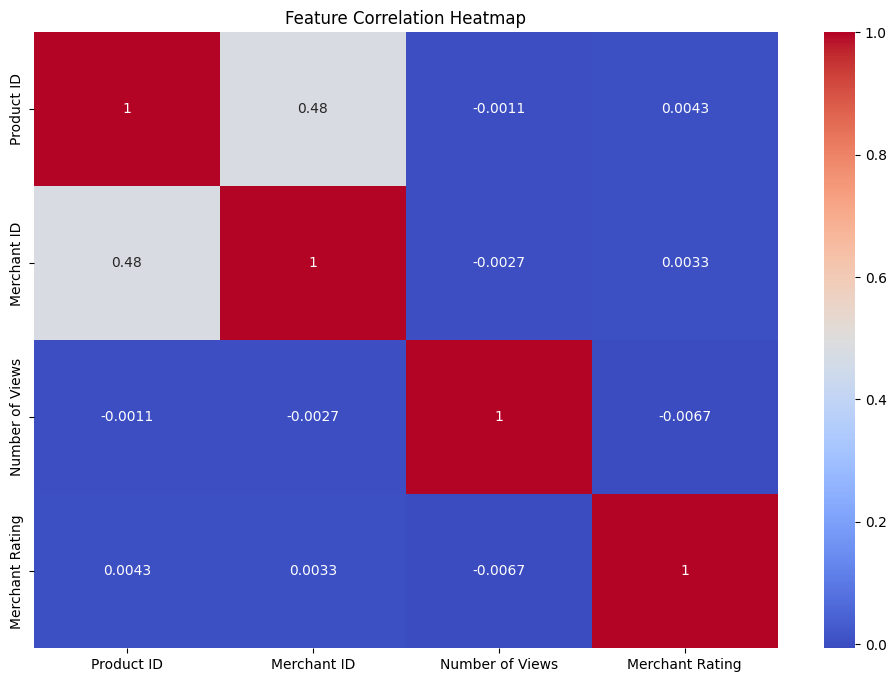

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

Ok this start to be really clear. For sure we have to dig in more.The information that we have is not helping us, we have to show our skill in creating new information.

I was really close to start removing columns from my dataset without understanding the fact that i will need more data even though my dataset have 35000 rows so let`s be efficient and remove all NaN values because if i want to creat new data i need a set that don`t have those values.

In [127]:
df = df.dropna().reset_index()
df.isna().sum()

,0
index,0
Product ID,0
Product Title,0
Merchant ID,0
Category Label,0
Product Code,0
Number of Views,0
Merchant Rating,0
Listing Date,0
title dimension,0


Now that i`m sure that i don``t have NaN values i will try to see if i can extract something from the product title.

In [130]:
df['title dimension_words']=df['Product Title'].apply(lambda x: len(x.split()))
df['title dimension_letters']=df['Product Title'].apply(lambda x: len(x))

print(df.filter(items=['Product Title','title dimension_letters','title dimension_words']))


                                           Product Title  \
0                        apple iphone 8 plus 64gb silver   
1                    apple iphone 8 plus 64 gb spacegrau   
2      apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...   
3                    apple iphone 8 plus 64gb space grey   
4      apple iphone 8 plus gold 5.5 64gb 4g unlocked ...   
...                                                  ...   
34755  smeg fab28 60cm retro style right hand hinge f...   
34756  smeg fab28 60cm retro style left hand hinge fr...   
34757  smeg fab28 60cm retro style left hand hinge fr...   
34758     candy 60cm built under larder fridge cru160nek   
34759           neff k4316x7gb built under larder fridge   

       title dimension_letters  title dimension_words  
0                            6                     31  
1                            7                     35  
2                           13                     70  
3                            7                     35  

Ok before i was trying to foud something in my data that will apply for everything that i have here but i will change the strategy so now i will try to find some particularities for each category.